In [1]:
# 1. T_test

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/cats.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [3]:
s_m = df.loc[df['Sex'] == 'M', 'Bwt']
s_f = df.loc[df['Sex'] == 'F', 'Bwt']
s_m

47     2.0
48     2.0
49     2.1
50     2.2
51     2.2
      ... 
139    3.7
140    3.8
141    3.8
142    3.9
143    3.9
Name: Bwt, Length: 97, dtype: float64

In [4]:
s_m_i = pd.value_counts(s_m.values, sort = False)
s_f_i = pd.value_counts(s_f.values, sort = False)
s_m_i

2.0    2
2.1    1
2.2    8
2.3    1
2.4    5
2.5    8
2.6    6
2.7    9
2.8    7
2.9    5
3.0    9
3.1    6
3.2    6
3.3    5
3.4    5
3.5    5
3.6    4
3.7    1
3.8    2
3.9    2
dtype: int64

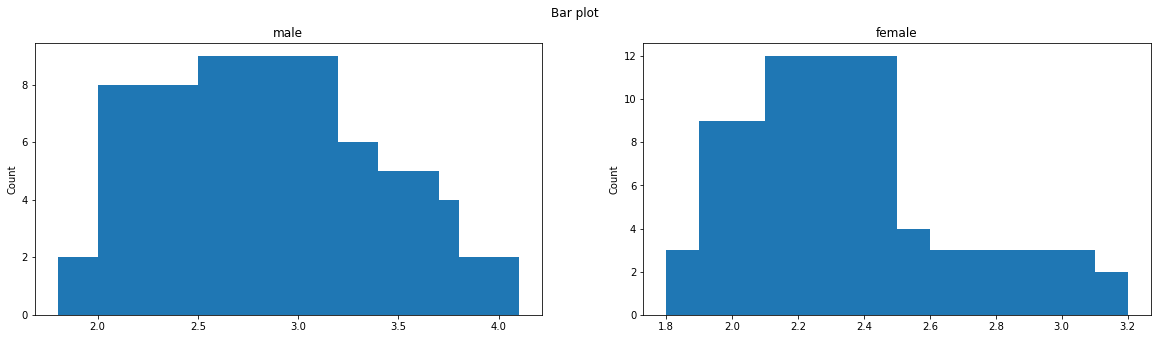

20
20
Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
  

In [5]:
fig, axs = plt.subplots(1,2, figsize = (20,5))
fig.suptitle('Bar plot')
width = 0.4

axs[0].bar(s_m_i.index, s_m_i.values, width)
axs[0].set_title('male')
axs[0].set_ylabel('Count')

axs[1].bar(s_f_i.index, s_f_i.values, width)
axs[1].set_title('female')
axs[1].set_ylabel('Count')
plt.show()
print(len(s_m_i.index)) # X
print(len(s_m_i.values)) # Y
help(plt.bar)

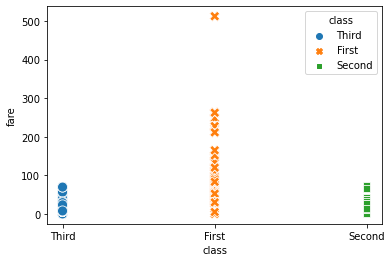

In [9]:
# 2. 분산분석
df = pd.read_csv('data/titanic.csv')
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'class',
                y = 'fare',
                hue = 'class',
                style = 'class',
                s = 100,
                data = df)
plt.show()

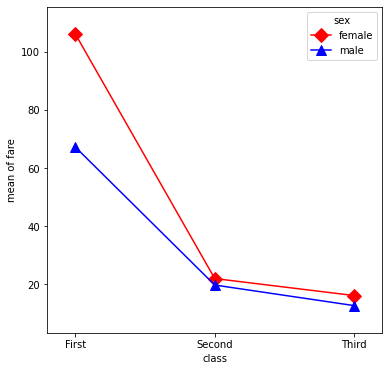

In [11]:
# 상호작용그래프
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize = (6,6))
fig = interaction_plot(df['class'], df['sex'], df['fare'], colors = ['red', 'blue'], markers = ['D', '^'], ms = 10, ax = ax)

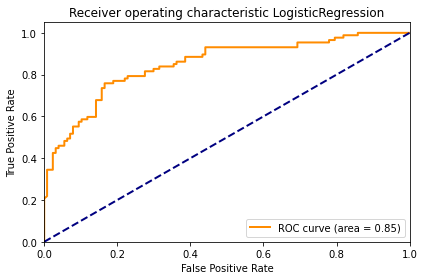

In [176]:
# 3. 로지스틱 회귀분석 
# ROC 커브 시각화
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


def draw_roc(y_test, y_predict_proba, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_predict_proba) # y_predict_proba 주의(확률)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color = 'darkorange',
            lw = lw, label = "ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic {}".format(model_name))
    plt.legend(loc='lower right')
    plt.ion()
    plt.tight_layout()
    plt.show()
draw_roc(y_test, y_predict_proba, "LogisticRegression")

In [ ]:
# 4. 회귀분석

In [52]:
# 5. 군집분석 (K-means 군집분석)
# SSE (엘보우기법)
import matplotlib.pyplot as plt

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters = i, random_state = 1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The number of clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)

C:\Users\KDB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


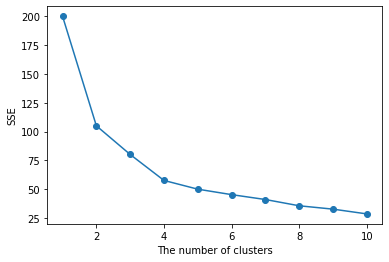

[200.0, 104.96163315756871, 80.08569526137276, 57.55425863091104, 49.96920284452793, 45.236049045772866, 40.99965950480165, 35.570970075454255, 32.65195608327404, 28.518626026978588]


In [45]:
elbow(X)

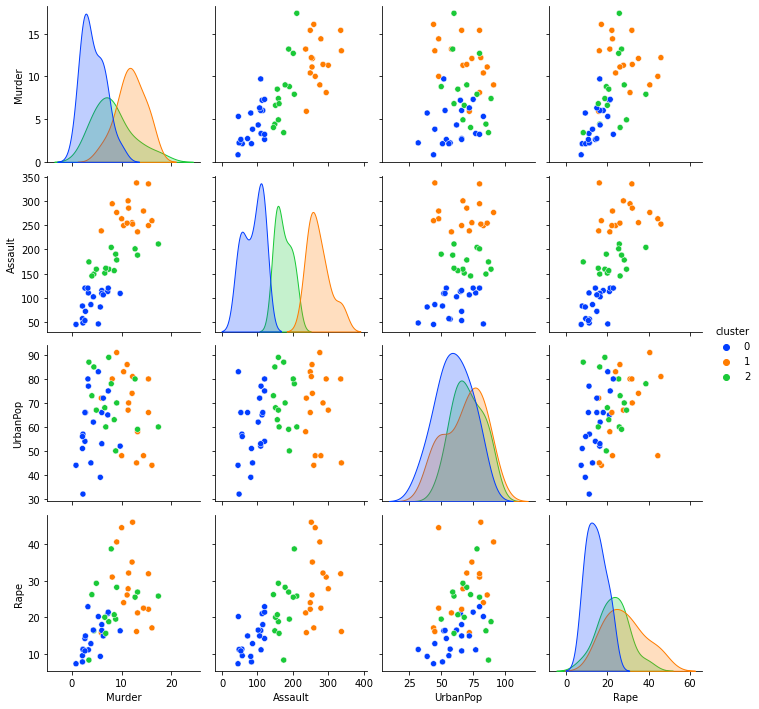

In [57]:
# pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(X,
             diag_kind = 'kde',
             hue = 'cluster',
             palette = 'bright')
plt.show()

###### pairplot
###### 데이터프레임의 열(변수)을 두 개씩 짝 지을 수 있는 모든 조합에 대해서 표현
###### ex)) 1행(Murder), 2열(Assault) : 강도 발생률이 높을 수록, 살인률이 높다.

Length_min 141 , Length_max 219  
Weight_min 1695 , Weight_max 4105  


Text(0, 0.5, 'Weight')

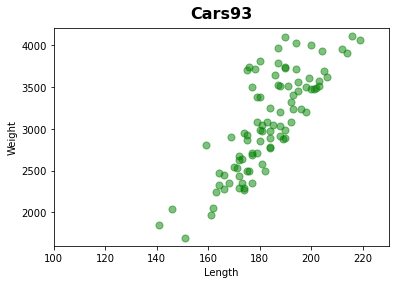

In [29]:
# 1. 산점도 - 두 개의 연속형 변수 관계 시각화
# 두 개의 연속형 변수간의 관계를 알아볼 수 있도록 좌표평면 상에 관측점을 찍어 나타낸 그래프
# 좌표형면 상의 관측점은 두 변수를 의미하는 x, y의 점으로 나타냄
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/Cars93.csv')
df[['Length', 'Weight']]
plt.scatter(x = df['Length'], y = df['Weight'], c = 'g', s = 50, alpha = 0.5) # c : 컬러, s : 크기, alpha : 투명도

print('Length_min %d , Length_max %d  ' %(df['Length'].min(), df['Length'].max()))
print('Weight_min %d , Weight_max %d  ' %(df['Weight'].min(), df['Weight'].max()))

plt.axis([100, 230, 1600, 4200]) # x축_최소, x축_최대, y축_최소, y축_최대 

title_font = {'fontsize' : 16, 'fontweight' : 'bold'}
plt.title('Cars93', loc = 'center', pad = 10, fontdict = title_font)
plt.xlabel('Length')
plt.ylabel('Weight')

<AxesSubplot:xlabel='Length', ylabel='Weight'>

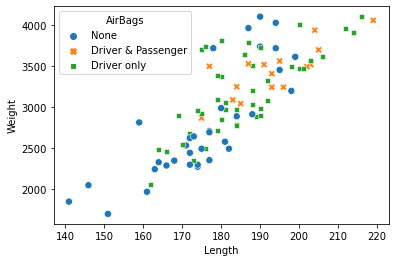

In [37]:
# 1-2) 산점도 - 범주별로 색 구분
import seaborn as sns
import pandas as pd
df = pd.read_csv('data/Cars93.csv')
df['AirBags'].value_counts()
sns.scatterplot(data = df, x = 'Length', y = 'Weight', hue = 'AirBags', style = 'AirBags', s = 50) # hue : 범주별 다른 색, style : 범주별 다른 모양 

#### 1-3) 상관관계 시각화(히트맵)



* 두 변수 간의 관계의 정도     

* 두 확률변수가 함께 변화하는지의 정도를 측정하는 값
    * 단점 : 측정 단위 크기를 반영하지 못해 절대적인 상관성의 정도를 파악하기 어려움
    * 단점 극복 : 공분산을 두 변수의 표준편차 곱으로 나누어 표준화시킴 (= 상관계수)



#### 상관분석의 유형
__가.__ 피어슨 상관계수
* 두 연속형 자료가 모두 정규성을 따른다는 가정
* 선형적 상관관계를 측정
* -1부터 1사이의 값    

<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">판다스 사용 시</td>
            <td style="text-align: left;">corr(method='pearson')</td>
        </tr>
        <tr>
            <td style="text-align: left;">싸이파이 사용 시</td>
            <td style="text-align: left;">stats.pearsonr(df1, df2)</td>
        </tr>
    </table>
</div>   

__나.__ 스피어만 상관계수
* 두 변수가 정규성을 만족하지 않거나, 변수가 순위 및 순서 형태로 주어지는 경우
* 비모수적 방법 (데이터에 순위를 매긴 후 그 순위에 대한 상관계수를 산출함. 실제값 이용 X)
* -1부터 1사이의 값
* 비선형관계의 연관성 파악 가능
* 연속형, 이산형, 순서형 자료에 적용 가능

<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">판다스 사용 시</td>
            <td style="text-align: left;">corr(method='spearman')</td>
        </tr>
        <tr>
            <td style="text-align: left;">싸이파이 사용 시</td>
            <td style="text-align: left;">stats.spearmanr(df1, df2) </td>
        </tr>
    </table>
</div>        


__다.__ 켄달의 순위상관계수
* 데이터가 순서쌍(Xi, Yi)로 주어졌을 때
    * Xi가 커짐에 따라 Yi도 커질 경우: 부합
    * Xi가 커짐에 따라 Yi가 작아질 경우: 비부합
* 전체 데이터에서 비부합상에 대한 부합쌍의 비율로 상관계수를 산출함
* -1부터 1사이의 값
    * 순위상관계수가 1일 경우: 부합쌍의 비율이 100%
    * 순위상관계수가 -1일 경우: 비부합쌍의 비율이 100%
    * 순위상관계수가 0일 경우: 두 변수 X와 Y는 상관성이 없음

<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">판다스 사용 시</td>
            <td style="text-align: left;">corr(method='kendall')</td>
        </tr>
        <tr>
            <td style="text-align: left;">싸이파이 사용 시</td>
            <td style="text-align: left;">stats.kendalltau(df1, df2) </td>
        </tr>
    </table>
</div>   

__[예제]__
air 데이터 내의 네 가지 변수 조합별 피어슨 상관계수 그래프 그리기

            Ozone   Solar.R      Wind      Temp     Month       Day
Ozone    1.000000  0.348342 -0.601547  0.698360  0.164519 -0.013226
Solar.R  0.348342  1.000000 -0.056792  0.275840 -0.075301 -0.150275
Wind    -0.601547 -0.056792  1.000000 -0.457988 -0.178293  0.027181
Temp     0.698360  0.275840 -0.457988  1.000000  0.420947 -0.130593
Month    0.164519 -0.075301 -0.178293  0.420947  1.000000 -0.007962
Day     -0.013226 -0.150275  0.027181 -0.130593 -0.007962  1.000000 

            Ozone   Solar.R      Wind      Temp     Month       Day
Ozone    1.000000  0.348186 -0.590155  0.774043  0.137861 -0.056198
Solar.R  0.348186  1.000000 -0.000977  0.207428 -0.127823 -0.152308
Wind    -0.590155 -0.000977  1.000000 -0.446541 -0.157849  0.037569
Temp     0.774043  0.207428 -0.446541  1.000000  0.372075 -0.157068
Month    0.137861 -0.127823 -0.157849  0.372075  1.000000 -0.007852
Day     -0.056198 -0.152308  0.037569 -0.157068 -0.007852  1.000000 

            Ozone   Solar.R      Wind      T

<AxesSubplot:>

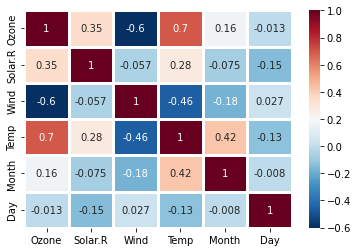

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/airquality.csv')
df_p = df.corr(method = 'pearson')
df_s = df.corr(method = 'spearman')
df_k = df.corr(method = 'kendall')

print(df.corr(method = 'pearson'), '\n')
print(df.corr(method = 'spearman'), '\n')
print(df.corr(method = 'kendall'), '\n')

# fig, axs = plt.subplots(1,2,figsize=(12,10))
sns.heatmap(df_p, xticklabels = df_p.columns, yticklabels = df_p.columns, cmap= 'RdBu_r', annot = True, linewidth = 3) 
# annot=True : 상관계수 텍스트로 보이게 해줌

#### 1-4) 산점도 행렬

두 개 이상의 변수가 있는 데이터에서 변수들 간의 산점도를 그린 그래프

여러 변수들 간의 산점도를 한 번에 볼 수 있도록 표현하여 변수들 간의 상관관계를 비교할 수 있음


<seaborn의 pairplot>  
> seaborn.pairplot(data, hue=None, kind='scatter', diag_kind='auto', markers=None, dropna=False, corner=True)
> - data : pandas.DataFrame
> - hue : 데이터의 범주형 변수. 집단을 색으로 구분해서 플롯을 그려줌
> - kind : 'scatter'(산점도), 'kde'(밀도그래프), 'hist'(히스토그램), 'reg'(회귀선)로 구성.
> - diag_kind : 'auto', 'hist', 'kde', None으로 구성
> - markers : 마커 코드
> - corner : True로 할 경우 세모 모양 상관계수 그래프 (디폴트는 False)

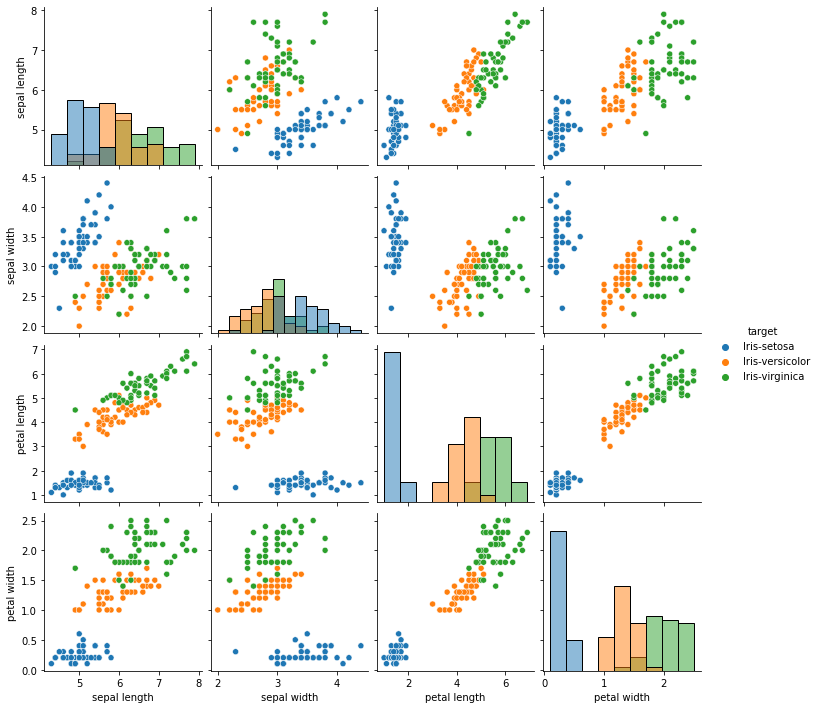

In [241]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('data/iris.csv')
sns.pairplot(df, hue = 'target', kind = 'scatter', diag_kind = 'hist', corner = False)

#sns.pairplot(df, hue = 'target', kind = 'scatter', diag_kind = 'auto', corner = False)
#sns.pairplot(df, hue = 'target', kind = 'kde', diag_kind = 'hist', corner = False)
#sns.pairplot(df, hue = 'target', kind = 'hist', diag_kind = 'kde', corner = False)
#sns.pairplot(df, hue = 'target', kind = 'reg', diag_kind = 'None', corner = False)

array([[<AxesSubplot:xlabel='sepal length', ylabel='sepal length'>,
        <AxesSubplot:xlabel='sepal width', ylabel='sepal length'>,
        <AxesSubplot:xlabel='petal length', ylabel='sepal length'>,
        <AxesSubplot:xlabel='petal width', ylabel='sepal length'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>,
        <AxesSubplot:xlabel='sepal width', ylabel='sepal width'>,
        <AxesSubplot:xlabel='petal length', ylabel='sepal width'>,
        <AxesSubplot:xlabel='petal width', ylabel='sepal width'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='petal length'>,
        <AxesSubplot:xlabel='sepal width', ylabel='petal length'>,
        <AxesSubplot:xlabel='petal length', ylabel='petal length'>,
        <AxesSubplot:xlabel='petal width', ylabel='petal length'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='petal width'>,
        <AxesSubplot:xlabel='sepal width', ylabel='petal width'>,
        <AxesSubplot:xlabel='petal length', ylabel='petal 

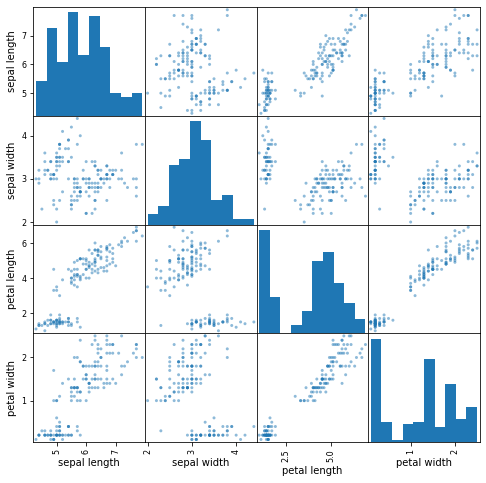

In [244]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['sepal length','sepal width','petal length','petal width']], alpha=0.5, figsize=(8, 8), diagonal='hist')

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


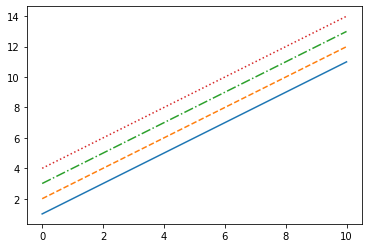

In [93]:
# 2. 선 종류
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,11) # 0 ~ 10까지 11등분
#fig = plt.figure()
#ax = plt.axes()
plt.plot(x, x+1, linestyle = '-' ) # solid
plt.plot(x, x+2, linestyle = '--') # dashed
plt.plot(x, x+3, linestyle = '-.') # dashdot
plt.plot(x, x+4, linestyle = ':') # dotted

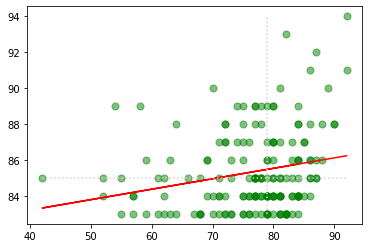

In [90]:
# 2-2) 직선그래프
# plt.plot(x축, 회귀식, data=데이터, c='color') 
# plt.hlines(y, xmin , xmax) # y=h 형태의 수평선
# plt.vlines(x, ymin , ymax) # x=v 형태의 수직선

# fifa 데이터에서 passing과 overall 사이의 선형회귀모형을 생성한 뒤, 직선 그래프로 표현하기
# 선형 회귀식에 대한 그래프는 passing과 overall에 대한 산점도 위에 나타내며, 색상은 빨강으로 지정하여 표현
# overall의 중위수는 수평선, passing의 중위수는 수직선으로 그리되 각각의 선은 점 스타일의 회색 선으로 지정
import pandas as pd

df = pd.read_csv('data/players_20.csv')
feature = ['sofifa_id','short_name','passing','overall']
df = df[feature].head(200)
df.isnull().sum()
df.dropna(inplace = True)
df.isnull().sum()

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df[['passing']], df['overall'])

import matplotlib.pyplot as plt

plt.scatter(df['passing'], df['overall'], c = 'g', s = 50, alpha = 0.5) # 원 데이터의 산점도
plt.plot(df['passing'], lr.predict(df[['passing']]), c = 'r', linestyle = '-') # 회귀직선
plt.hlines(df['overall'].median(), df['passing'].min(), df['passing'].max(), 'lightgrey', linestyle = ':') # y = h 수평선
plt.vlines(df['passing'].median(), df['overall'].min(), df['overall'].max(), 'lightgrey', linestyle = ':') # x = v 수직선

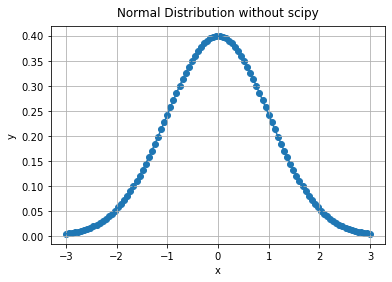

In [101]:
# 2-3) 곡선그래프
# 평균 0, 분산 1인 확률밀도함수(X축 범위 : -3 ~ +3)
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

x = np.linspace(-3,3,100) # -3 ~ +3 까지 100등분
y = stats.norm(0,1).pdf(x)
plt.scatter(x, y) # plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y') 
plt.grid() # 격자
plt.title("Normal Distribution without scipy", pad = 10)
plt.show()

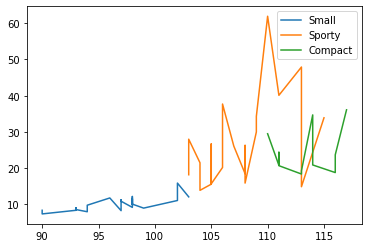

In [122]:
# 2-4) 꺾은선 그래프
# 여러 범주에 대한 관측값을 비교하거나 시간의 흐름에 따른 데이터에서 추세를 파악하기 위해 사용
# X축은 정렬되어 있어야 함
# [예시] Cars93에서 Wheelbase 따른 Type 별 Price의 관측값을 살펴보자
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/Cars93.csv')
df = df[['Wheelbase', 'Price','Type']].sort_values(by = 'Wheelbase')
plt.plot('Wheelbase', 'Price', data  = df.loc[df['Type'] == 'Small'] )
plt.plot('Wheelbase', 'Price', data  = df[df['Type'] == 'Midsize'] )
plt.plot('Wheelbase', 'Price', data  = df[df['Type'] == 'Large'] )
plt.legend(df['Type'].unique())
plt.show()

Text(0.5, 0, 'count')

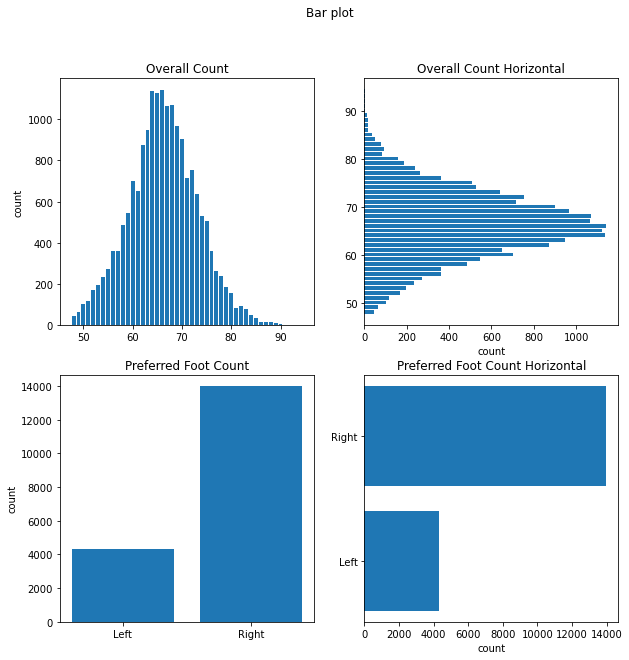

In [167]:
# 3. 막대그래프
# plt.bar(x, height, width=0.8, bottom=None, align='center', data=None, color='black', edgecolor='black')
# plt.barh(x, height, width=0.8, bottom=None, align='center', data=None, color='black', edgecolor='black') # horizontal
# 3-1)
# 1) fifa20 데이터의 overall 변수는 선수의 능력치를 나타낸다.
# 2) preferred_foot 변수는 선호하는 발을 의미하며, 총 2개의 범주로 이루어져 있다.
# > 두 범주형 변수의 각 레벨에 속하는 데이터의 개수를 막대그래프로 나타내어라.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/players_20.csv')
df_ov = df['overall'].value_counts()
df_pf = df['preferred_foot'].value_counts().sort_index()

fig, axs = plt.subplots(2,2, figsize = (10,10))
fig.suptitle('Bar plot')

axs[0][0].bar(df_ov.index, df_ov.values )
axs[0][0].set_title('Overall Count')
axs[0][0].set_ylabel('count')

axs[0][1].barh(df_ov.index, df_ov.values)
axs[0][1].set_title('Overall Count Horizontal')
axs[0][1].set_xlabel('count')


axs[1][0].bar(df_pf.index, df_pf.values)
axs[1][0].set_title('Preferred Foot Count')
axs[1][0].set_ylabel('count')

axs[1][1].barh(df_pf.index, df_pf.values)
axs[1][1].set_title('Preferred Foot Count Horizontal')
axs[1][1].set_xlabel('count')

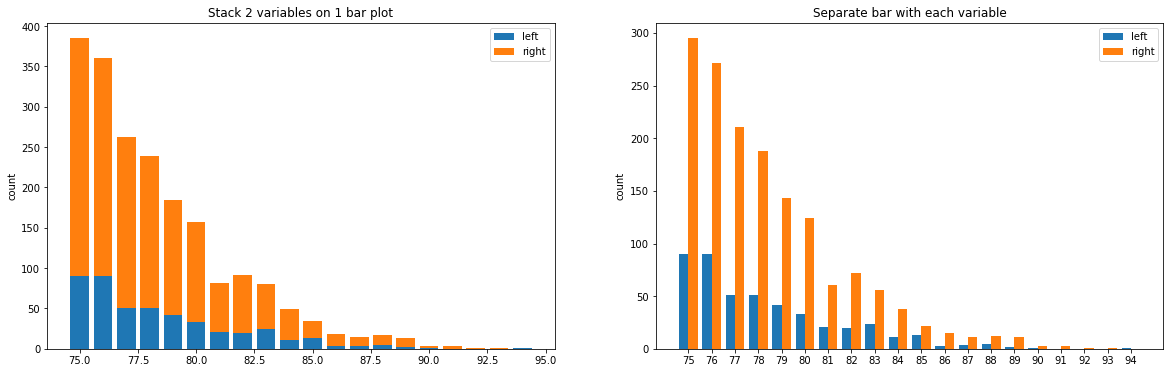

In [193]:
# 3-2) fifa20 데이터의 overall preferred_foot 변수의 범주별 데이터 개수를 막대그래프로 한 번에 표현하고 범례를 함께 나타내기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/players_20.csv').head(2000)
table = pd.crosstab(df['overall'], df['preferred_foot']) # index가 overall values가 left의 값 또는 right의 값

fig, axs = plt.subplots(1,2, figsize = (20,6))
axs[0].bar(table['Left'].index, table['Left'].values, label = 'left') 
axs[0].bar(table['Right'].index, table['Right'].values, bottom = table['Left'].values, label = 'right')
axs[0].set_title('Stack 2 variables on 1 bar plot')
axs[0].set_ylabel('count')
axs[0].legend()


idx = table['Right'].index
ind = np.arange(1,len(idx)+1)
ind
width = 0.4
axs[1].bar(ind - width/2, table['Left'].values, width, label = 'left')
axs[1].bar(ind + width/2, table['Right'].values, width , label = 'right')
axs[1].set_xticks(ind) # set_xticklabels 호출 이전에 선행해서 호출되어야 함 (눈금 고정)
axs[1].set_xticklabels(idx) # bar 플롯 x축의 범주를 문자열 값으로 변경
axs[1].set_ylabel('count')
axs[1].set_title('Separate bar with each variable')
axs[1].legend()

plt.show()

####  4. 히스토그램

도수별 분포를 나타내는 도수분포표를 그래프로 그린 것

<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;" rowspan="2">막대그래프</td>
            <td style="text-align: left;"><span style='color: #DC143C'>범주형</span>으로 구분된 변수의 범주별 데이터 수를 구한 것</td>
        </tr>
        <tr>
            <td style="text-align: left;">범주의 순서를 의도에 따라 변경 가능<td>
        </tr>
        <tr>
            <td style="text-align: left;" rowspan="2">히스토그램</td>
            <td style="text-align: left;"><span style='color: #DC143C'>연속된 수</span>를 일정한 구간으로 나눈 후 구간별 데이터의분포를 그래프로 표현한 것</td>
        </tr>
        <tr>
            <td style="text-align: left;">임의로 범주의 순서를 바꿀 수 없음<td>
        </tr>
    </table>
</div>


> plt.hist(x, bins=None, range=None, density=False, color=None, data=None)

bins : 히스토그램의 구간의 개수 정의<br>
range : bin의 상한값과 하한값 (x.min(), x.max()) 형태로 선언<br>
density : True이면 확률밀도함수를 그리고 반환

<br>

<b>4-1)</b>

fifa20 데이터의 wage_eur 변수에 대해 막대 구간의 개수를 지정하지 않은 히스토그램과 구간의 개수를 5로 지정한 히스토그램 그리기

(array([3.40909091e-06, 4.54545455e-06, 1.70454545e-06, 1.13636364e-06,
        5.68181818e-07]),
 array([125000., 213000., 301000., 389000., 477000., 565000.]),
 <BarContainer object of 5 artists>)

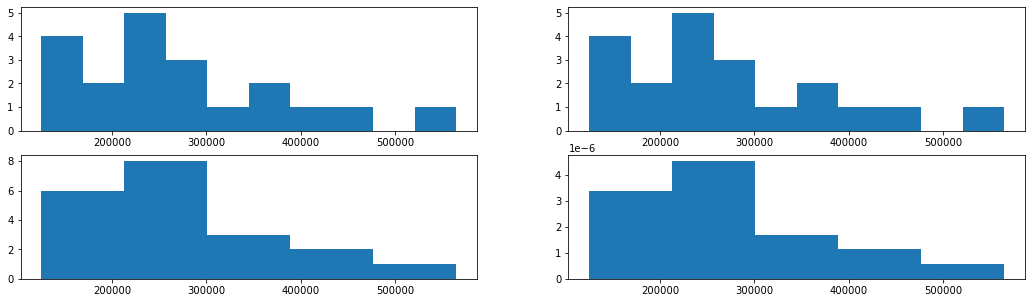

In [209]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('data/players_20.csv').head(20)

fig, axs = plt.subplots(2,2, figsize = (18,5))
axs[0][0].hist('wage_eur', data = df)
axs[0][1].hist(df['wage_eur'])

axs[1][0].hist('wage_eur', data = df, bins = 5)
axs[1][1].hist(df['wage_eur'], bins = 5, density = True)